1. Trafik akışının değişmesi kazaları nasıl etkiler?
2. Kaza oranlarını ne artırır?
3. Zaman içinde kaza oranlarını tahmin edebilir miyiz?
4. Kırsal ve kentsel alanlar nasıl farklılaştı?

In [22]:
## modüller yüklendi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

##.csv dosyaları yüklendi

first_data = pd.read_csv("accidents_2005_to_2007.csv",low_memory=False)
second_data = pd.read_csv("accidents_2009_to_2011.csv",low_memory=False)
third_data = pd.read_csv("accidents_2012_to_2014.csv",low_memory=False)

data = pd.concat([first_data, second_data, third_data])

Trafik akışının değişmesi kazaları nasıl etkiler ve kaza oranlarını ne artırır?

C:\Users\wasd0\AppData\Local\Temp\ipykernel_8656\2698669800.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = "Year", y = "Number_of_Casualties", data = accident_year_surface, ci = 0)


<AxesSubplot: xlabel='Year', ylabel='Number_of_Casualties'>

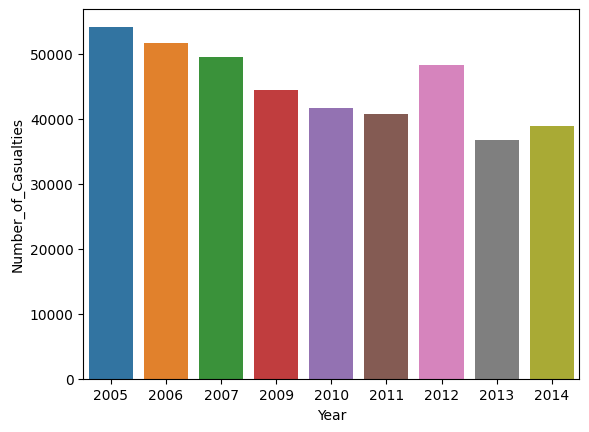

In [25]:
##yıllara göre kaza sayılarına bakıldı

import seaborn as sns
sns.barplot(x = "Year", y = "Number_of_Casualties", data = accident_year_surface, ci = 0)

C:\Users\wasd0\AppData\Local\Temp\ipykernel_8656\3849933328.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = "Year", y = "Number_of_Casualties",hue = "Road_Surface_Conditions", data = accident_year_surface, ci = 0)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

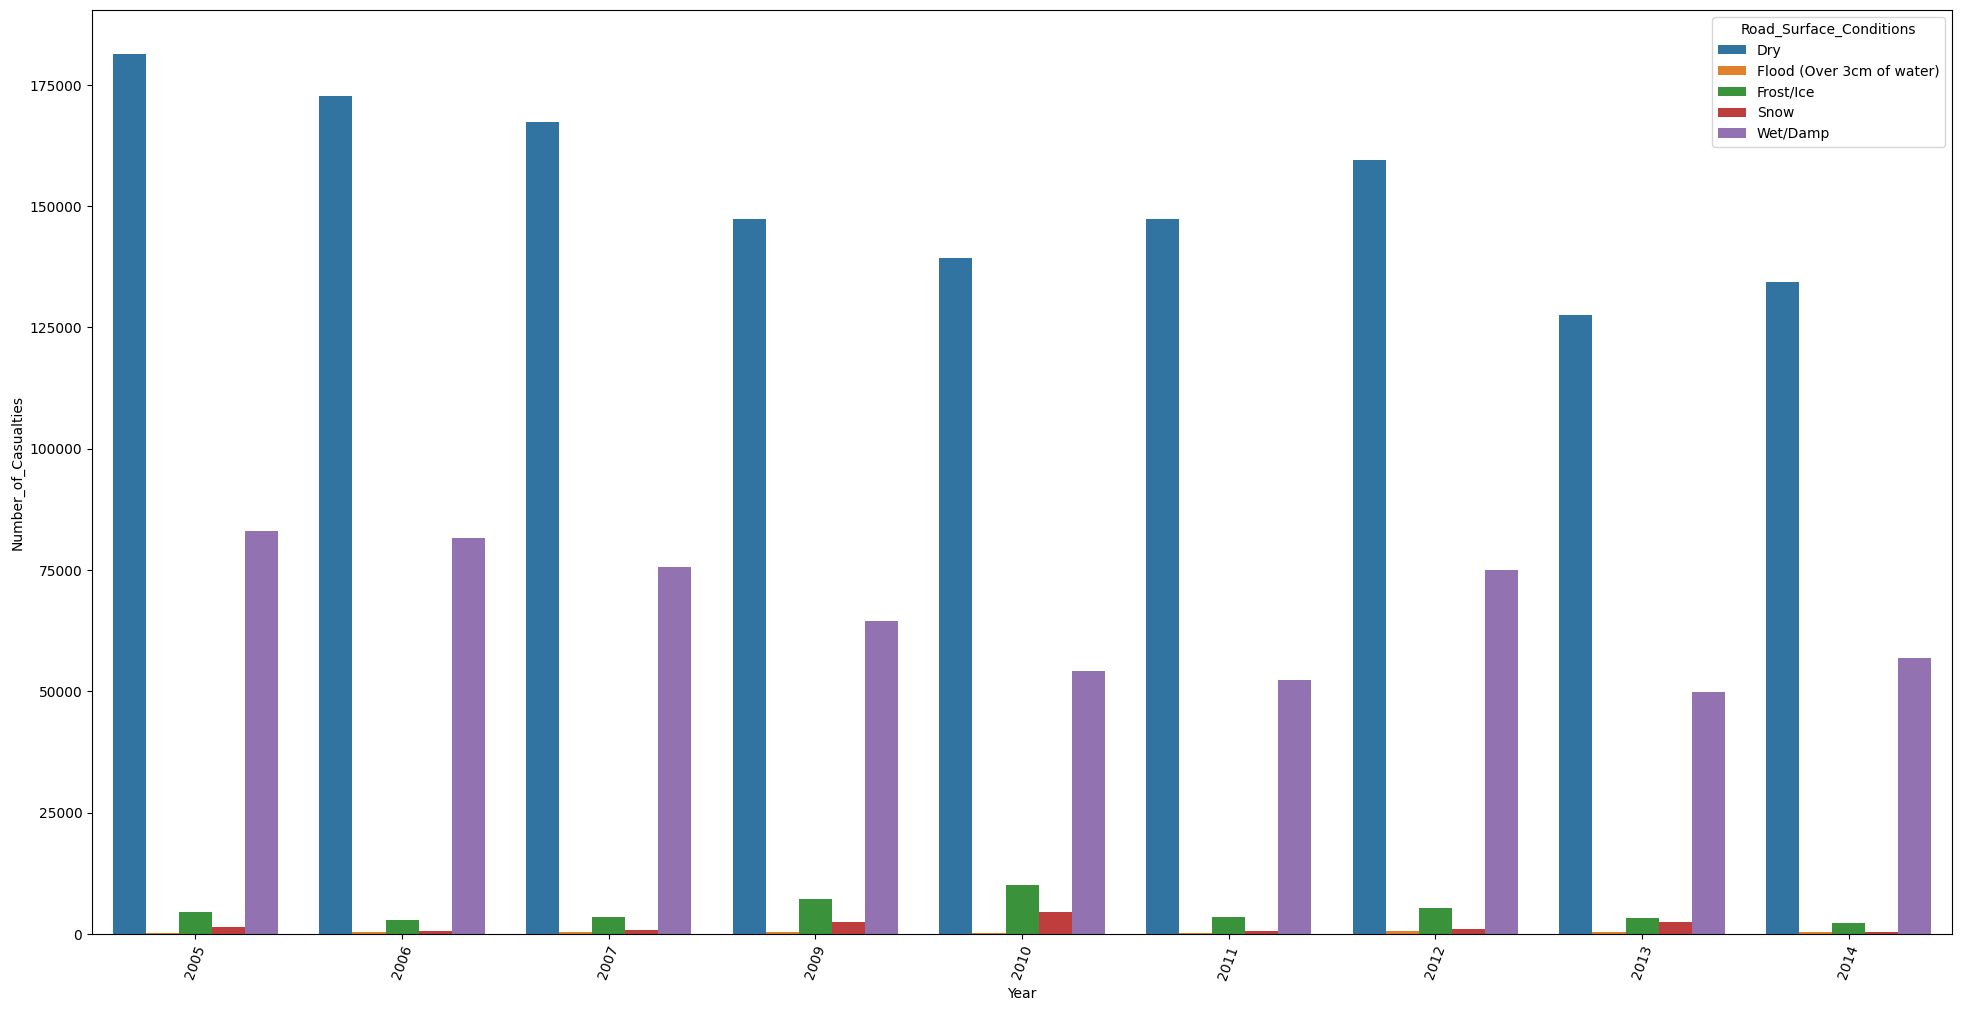

In [26]:
## yıllara ve yolun durumuna göre kazaların görülme sıklığına bakıldı
import seaborn as sns

accident_year_surface = data.groupby(["Year", "Road_Surface_Conditions"])[["Number_of_Casualties"]].sum()
                                                                                
accident_year_surface.describe().T

accident_year_surface.reset_index(inplace = True)
accident_year_surface

plt.figure(figsize = (24, 12))
sns.barplot(x = "Year", y = "Number_of_Casualties",hue = "Road_Surface_Conditions", data = accident_year_surface, ci = 0)
plt.xticks(rotation = 70)

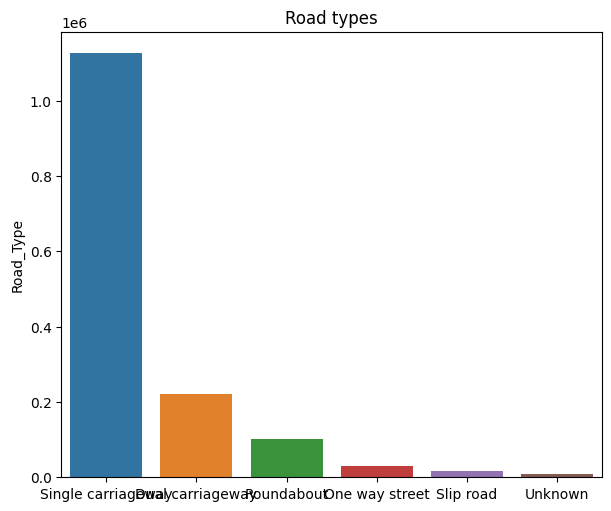

In [27]:
## daha çok kaza görülen yolların sıklığına bakıldı

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

road = data["Road_Type"].value_counts()

sns.barplot(ax=axs, x = road.index, y = road)
axs.set_title("Road types")


plt.show()

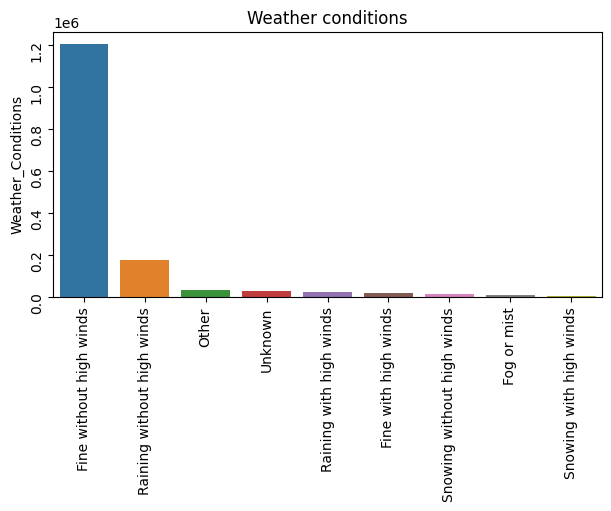

Fine without high winds       1203943
Raining without high winds     177663
Other                           33503
Unknown                         28296
Raining with high winds         20813
Fine with high winds            18355
Snowing without high winds      11301
Fog or mist                      8190
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

In [28]:
## hava durumuna göre kaza sıklıklarına bakıldı

weather = data["Weather_Conditions"].value_counts()

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

sns.barplot(ax=axs, x = weather.index, y = weather)
axs.set_title("Weather conditions")
axs.tick_params(labelrotation=90)


plt.show()

weather

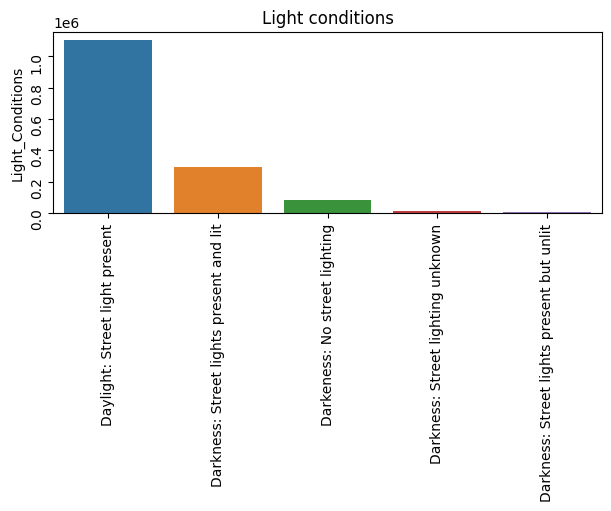

In [29]:
## Hava koşullarına göre kaza sıklığına bakıldı

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

light = data["Light_Conditions"].value_counts()

sns.barplot(ax=axs, x = light.index, y = light)
axs.set_title("Light conditions")
axs.tick_params(labelrotation=90)

Text(0.5, 1.0, 'Speed limit')

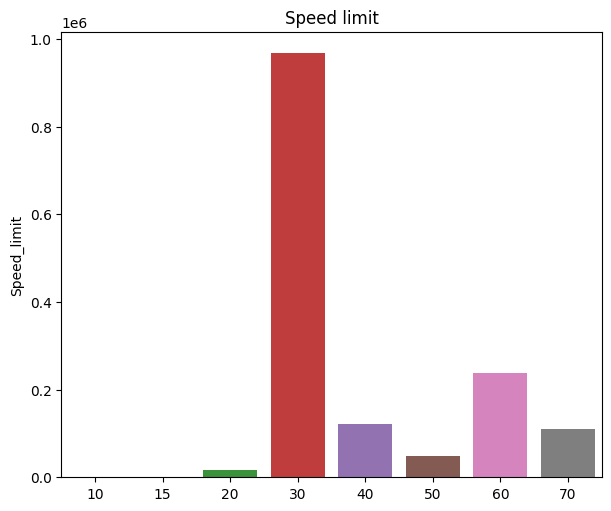

In [30]:
## Yollardaki hız limitine göre kaza sıklığına bakıldı

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

speed = data["Speed_limit"].value_counts()
sns.barplot(ax=axs, x = speed.index, y = speed)
axs.set_title("Speed limit")

Zaman içinde kaza oranlarını tahmin edebilir miyiz?

In [31]:
x = data.sample(frac=.1)
# x = accident_data.head(1)
y = x[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Weather_Conditions','Light_Conditions',
       'Road_Surface_Conditions','Speed_limit']]
y['Weather_Conditions'] = y['Weather_Conditions'].astype('category')
y['Light_Conditions'] = y['Light_Conditions'].astype('category')
y['Road_Surface_Conditions'] = y['Road_Surface_Conditions'].astype('category')
y['Speed_limit'] = y['Speed_limit'].astype('category')

print(y.size)
"""
y['Weather_Conditions_Cat'] = y['Weather_Conditions'].cat.codes
y['Light_Conditions_Cat'] = y['Light_Conditions'].cat.codes
y['Road_Surface_Conditions_Cat'] = y['Road_Surface_Conditions'].cat.codes
y['Speed_limit_Cat'] = y['Speed_limit'].cat.codes
"""

y.head()

1052905


C:\Users\wasd0\AppData\Local\Temp\ipykernel_8656\3152369793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Weather_Conditions'] = y['Weather_Conditions'].astype('category')
C:\Users\wasd0\AppData\Local\Temp\ipykernel_8656\3152369793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Light_Conditions'] = y['Light_Conditions'].astype('category')
C:\Users\wasd0\AppData\Local\Temp\ipykernel_8656\3152369793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Weather_Conditions,Light_Conditions,Road_Surface_Conditions,Speed_limit
6720,3,2,1,Fine without high winds,Daylight: Street light present,Wet/Damp,30
284250,3,1,1,Fine without high winds,Daylight: Street light present,Frost/Ice,40
318978,3,2,2,Fine without high winds,Daylight: Street light present,Wet/Damp,30
344774,2,2,6,Fine without high winds,Daylight: Street light present,Dry,60
111314,2,2,1,Fine without high winds,Daylight: Street light present,Wet/Damp,60


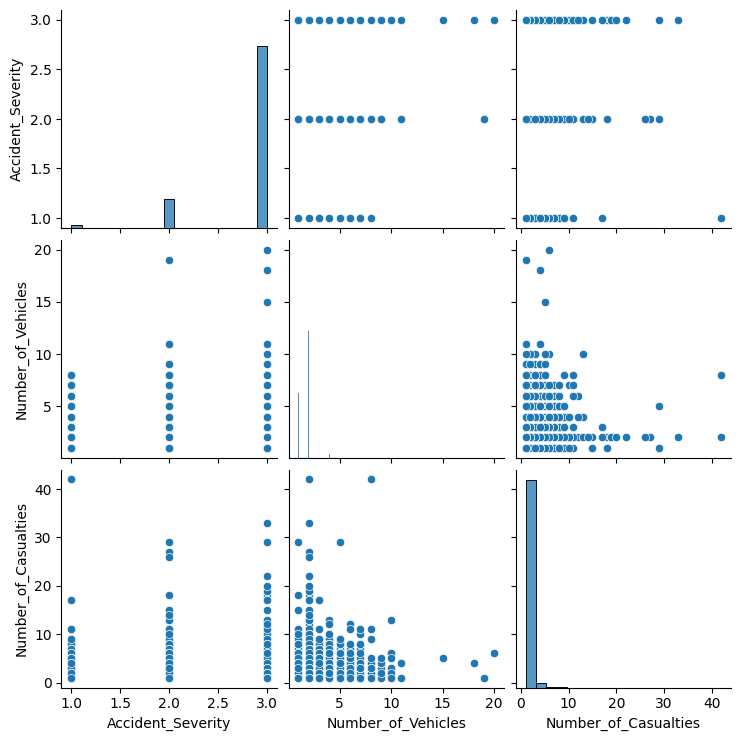

In [32]:
%matplotlib inline

import seaborn as sb
#sb.pairplot(y)
#y.index.is_unique
#y.index.duplicated()
k = y.loc[~y.index.duplicated(), :]

sb.pairplot(k)

Kırsal ve kentsel alanlar nasıl farklılaştı?

In [33]:
datas_2_for_plotting = data.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1,inplace=False)

C:\Users\wasd0\AppData\Local\Temp\ipykernel_8656\1884381588.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


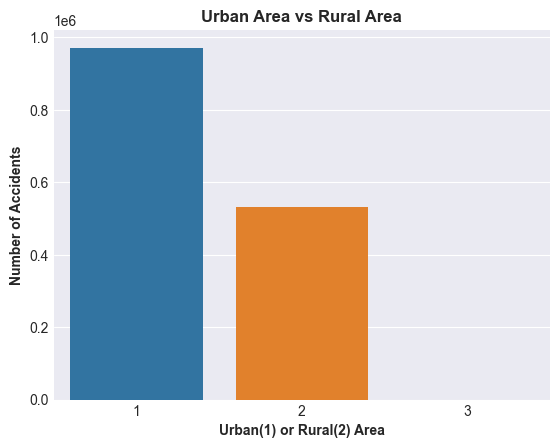

In [34]:
import seaborn as sns
datas_2_for_plotting["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=datas_2_for_plotting)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 